<a href="https://colab.research.google.com/github/Nicole0906/DLI_Group_Assignment/blob/main/Ewan_Kiong_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Change directory to the desired location in Google Drive
import os
os.chdir('/content/gdrive/MyDrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Model Training

✅ Dataset loaded successfully!
Shape: (10000, 50)
Columns: ['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL']
   id  NumDots  Subdo

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:42] WARNING: /w

📊 CV F1 Scores: [0.97499996 0.98187482 0.98312499 0.97437491 0.98124953]
➡️ Mean CV F1: 0.979
[0]	test-auc:0.97937
[50]	test-auc:0.99673
[100]	test-auc:0.99822
[150]	test-auc:0.99861
[200]	test-auc:0.99871
[250]	test-auc:0.99873
[252]	test-auc:0.99872


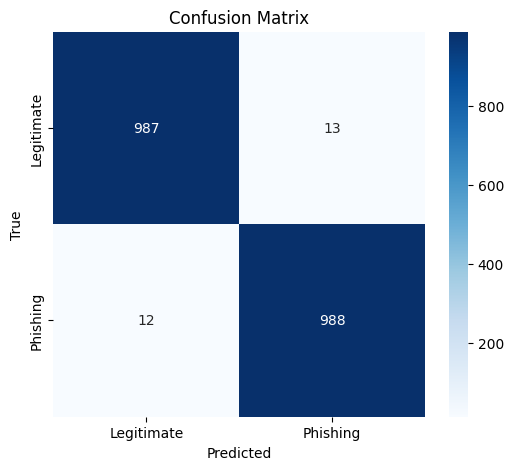


📑 Final Evaluation Table:

+----------------+-------------+----------+------------+-----------+-----------+------------------------------+
| Class          |   Precision |   Recall |   F1-score |   ROC-AUC |   Support |   Inference Time (ms/sample) |
+================+=============+==========+============+===========+===========+==============================+
| 0 (Legitimate) |       0.988 |    0.987 |      0.987 |     0.999 |      1000 |                        0.006 |
+----------------+-------------+----------+------------+-----------+-----------+------------------------------+
| 1 (Phishing)   |       0.987 |    0.988 |      0.988 |     0.999 |      1000 |                        0.006 |
+----------------+-------------+----------+------------+-----------+-----------+------------------------------+
| Accuracy       |       0.988 |    0.988 |      0.988 |     0.999 |      2000 |                        0.006 |
+----------------+-------------+----------+------------+-----------+--------

In [12]:
# ==============================
# STEP 1: Install dependencies
# ==============================
!pip install -q xgboost scikit-learn pandas matplotlib seaborn tabulate

# ==============================
# STEP 2: Import libraries
# ==============================
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, accuracy_score
)
from tabulate import tabulate

# ==============================
# STEP 3: Load dataset (directly via pandas)
# ==============================
url = "https://raw.githubusercontent.com/Nicole0906/DLI_Group_Assignment/main/Phishing_Legitimate_full%203.csv"
df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# ==============================
# STEP 4: Features & target
# ==============================
X = df.drop(columns=["id", "CLASS_LABEL"])
y = df["CLASS_LABEL"]

# ==============================
# STEP 5: Stratified train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

# ==============================
# STEP 6: XGBoost with CV (different from earlier)
# ==============================
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test, label=y_test)

# Stratified K-Fold CV for evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(
    xgb.XGBClassifier(**params, use_label_encoder=False),
    X_train, y_train,
    cv=cv, scoring="f1_weighted"
)
print(f"📊 CV F1 Scores: {scores}")
print(f"➡️ Mean CV F1: {scores.mean():.3f}")

# ==============================
# STEP 7: Train final model
# ==============================
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=400,
    evals=[(dtest, "test")],
    early_stopping_rounds=30,
    verbose_eval=50
)

# ==============================
# STEP 8: Evaluation
# ==============================
start = time.time()
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob >= 0.5).astype(int)
inference_time = (time.time() - start) / len(y_test) * 1000

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Legitimate", "Phishing"],
            yticklabels=["Legitimate", "Phishing"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ==============================
# STEP 9: Tabulated Results (like friend's style)
# ==============================
from sklearn.metrics import classification_report

# Classification report already computed
classes = [0, 1]
label_map = {0: "Legitimate", 1: "Phishing"}

# Per-class ROC-AUC
roc_auc_class0 = roc_auc_score((y_test == 0).astype(int), 1 - y_pred_prob)
roc_auc_class1 = roc_auc_score((y_test == 1).astype(int), y_pred_prob)
roc_auc_macro = roc_auc_score(y_test, y_pred_prob, average="macro")
roc_auc_weighted = roc_auc_score(y_test, y_pred_prob, average="weighted")

table_data = [
    [f"{classes[0]} ({label_map[0]})",
     round(report["0"]["precision"], 3),
     round(report["0"]["recall"], 3),
     round(report["0"]["f1-score"], 3),
     round(roc_auc_class0, 3),
     int(report["0"]["support"]),
     round(inference_time, 3)],

    [f"{classes[1]} ({label_map[1]})",
     round(report["1"]["precision"], 3),
     round(report["1"]["recall"], 3),
     round(report["1"]["f1-score"], 3),
     round(roc_auc_class1, 3),
     int(report["1"]["support"]),
     round(inference_time, 3)],

    ["Accuracy",
     round(report["accuracy"], 3),
     round(report["accuracy"], 3),
     round(report["accuracy"], 3),
     round(roc_auc_macro, 3),
     len(y_test),
     round(inference_time, 3)],

    ["Macro avg",
     round(report["macro avg"]["precision"], 3),
     round(report["macro avg"]["recall"], 3),
     round(report["macro avg"]["f1-score"], 3),
     round(roc_auc_macro, 3),
     int(report["macro avg"]["support"]),
     round(inference_time, 3)],

    ["Weighted avg",
     round(report["weighted avg"]["precision"], 3),
     round(report["weighted avg"]["recall"], 3),
     round(report["weighted avg"]["f1-score"], 3),
     round(roc_auc_weighted, 3),
     int(report["weighted avg"]["support"]),
     round(inference_time, 3)],
]

print("\n📑 Final Evaluation Table:\n")
print(tabulate(
    table_data,
    headers=["Class", "Precision", "Recall", "F1-score", "ROC-AUC", "Support", "Inference Time (ms/sample)"],
    tablefmt="grid"
))

# 🎯 Final verdict
final_f1 = round(report["weighted avg"]["f1-score"], 3)
TARGET_F1 = 0.98
verdict = "target met ✅" if final_f1 >= TARGET_F1 else "target not met ❌"

print(f"\n🎯 Final F1 Score: {final_f1}")
print(f"✅ Verdict: Achieved F1 = {final_f1}, target = {TARGET_F1} → {verdict}")

# Save model
model.save_model("xgboost_model.json")
print("\n✅ Model saved in Colab at: xgboost_model.json")
